In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [4]:
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

decoded_sequence

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
import tensorflow.keras.layers as layers

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=10, 
                    batch_size=512, 
                    validation_data=(x_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6508 - accuracy: 0.6002 - val_loss: 0.4551 - val_accuracy: 0.8242
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.4646 - accuracy: 0.7986 - val_loss: 0.3313 - val_accuracy: 0.8800
Epoch 3/10
30/30 [==============================] - 0s 14ms/step - loss: 0.3696 - accuracy: 0.8536 - val_loss: 0.3023 - val_accuracy: 0.8810
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 0.2945 - accuracy: 0.8919 - val_loss: 0.2738 - val_accuracy: 0.8900
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.2433 - accuracy: 0.9162 - val_loss: 0.2728 - val_accuracy: 0.8912
Epoch 6/10
30/30 [==============================] - 0s 13ms/step - loss: 0.2078 - accuracy: 0.9332 - val_loss: 0.2758 - val_accuracy: 0.8912
Epoch 7/10
30/30 [==============================] - 0s 14ms/step - loss: 0.1780 - accuracy: 0.9448 - val_loss: 0.2947 - val_accuracy: 0.8868


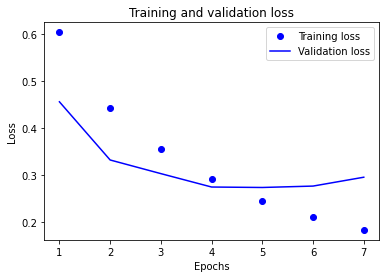

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3201 - accuracy: 0.8799


[0.3200637400150299, 0.8798800110816956]